In [4]:
# 超参数
COLS_Y = '销量（升）'
COLS_X = '价差'
SIGN_LINER = 0.7 #判断是否线性相关的显著性
SIGN_PVALUE = 0.05 #判断pValue的显著性
COLS_ALL = ['日期', '销量（升）', '石化站价格', '竞争站价格', '价差']

import pandas as pd

# 读取excel文件并获取指定列
df_uncleaned = pd.read_csv('Data/竞争站23年单站32809336.csv', usecols=COLS_ALL)
# 删除包含空值的行
df = df_uncleaned.dropna()
print(df.head())


           日期   销量（升）  石化站价格  竞争站价格    价差
0  2023-07-17   40.06   7.63   7.19  0.44
1  2023-07-18    0.24   7.63   7.19  0.44
2  2023-07-19  239.41   7.63   7.19  0.44
3  2023-07-20  381.09   7.63   7.19  0.44
4  2023-07-21  553.67   7.63   7.19  0.44


Spearman相关系数: -0.03934527742826024
p值: 0.6126027371847327


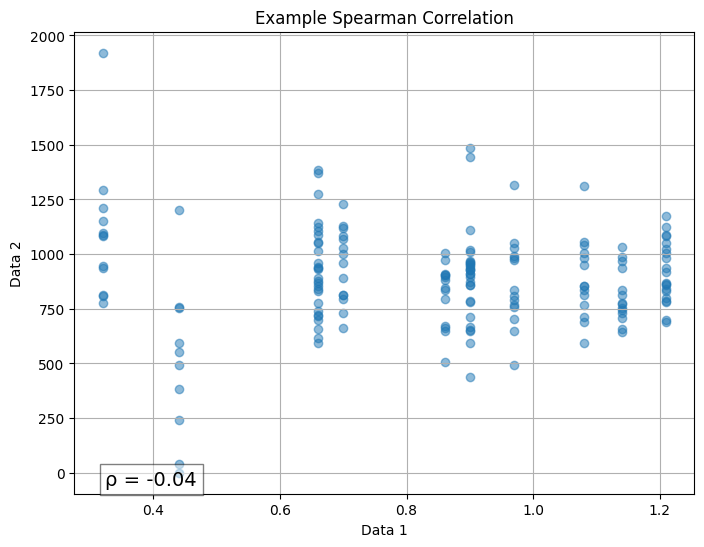

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def spearman_correlation_with_visualization(data1, data2, title='Spearman Correlation'):
    """
    计算两个数据集之间的Spearman等级相关性并进行可视化。
    
    参数:
    data1 : list 或 numpy.ndarray
        第一组数据。
    data2 : list 或 numpy.ndarray
        第二组数据，与data1具有相同数量的数据点。
    title : str
        图表的标题。
    """
    # 计算Spearman等级相关系数和p值
    correlation_coefficient, p_value = stats.spearmanr(data1, data2)
    
    print(f"Spearman相关系数: {correlation_coefficient}")
    print(f"p值: {p_value}")
    
    # 可视化数据点
    plt.figure(figsize=(8, 6))
    plt.scatter(data1, data2, alpha=0.5)
    plt.title(title)
    plt.xlabel('Data 1')
    plt.ylabel('Data 2')
    
    # 在散点图上添加相关系数
    if correlation_coefficient >= 0:
        plt.text(0.95, 0.01, f'ρ = {correlation_coefficient:.2f}', transform=plt.gca().transAxes,
                 fontsize=14, verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.5))
    else:
        plt.text(0.05, 0.01, f'ρ = {correlation_coefficient:.2f}', transform=plt.gca().transAxes,
                 fontsize=14, verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.5))
    
    # 显示图表
    plt.grid(True)
    plt.show()

# 使用示例
spearman_correlation_with_visualization(df[COLS_X], df[COLS_Y], title='Example Spearman Correlation')